In [2]:
#  register number: 22MIA1045
# name: Mathumita.s

# median house price prediction 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_csv("C:\\Users\\Selvakumar\\Desktop\\Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BIAS_COL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [6]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
BIAS_COL    0
dtype: int64

<Axes: >

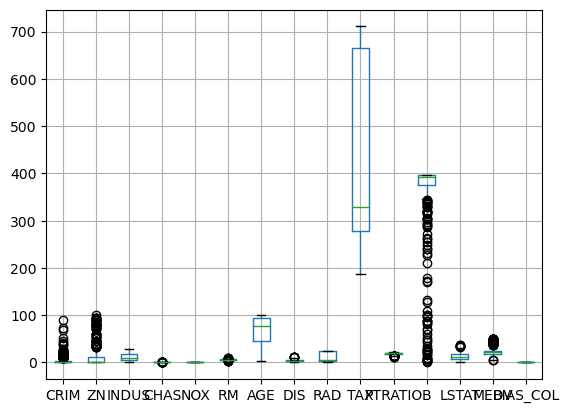

In [7]:
df.boxplot()

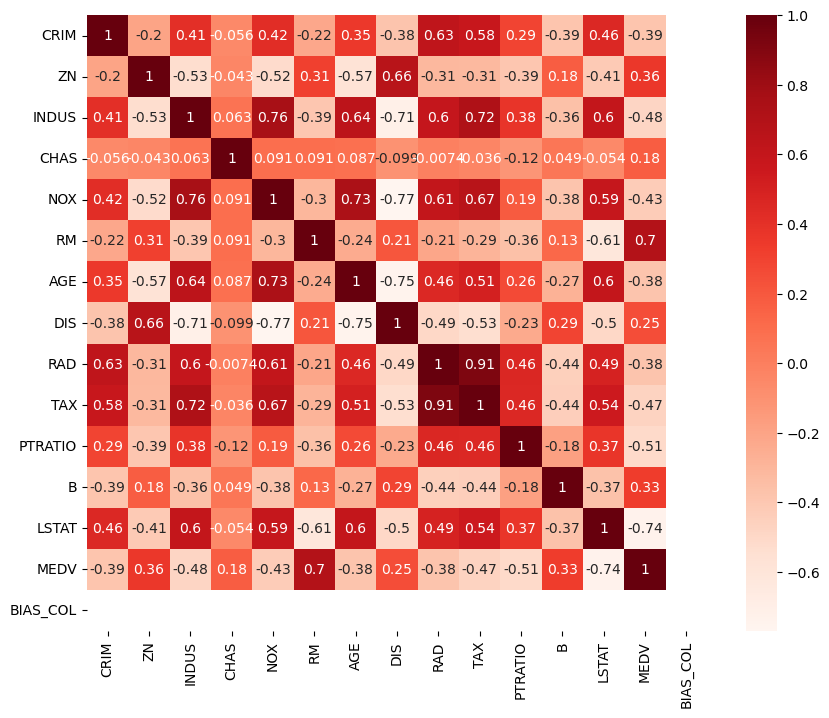

In [10]:

plt.figure(figsize=(10,8))                           
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

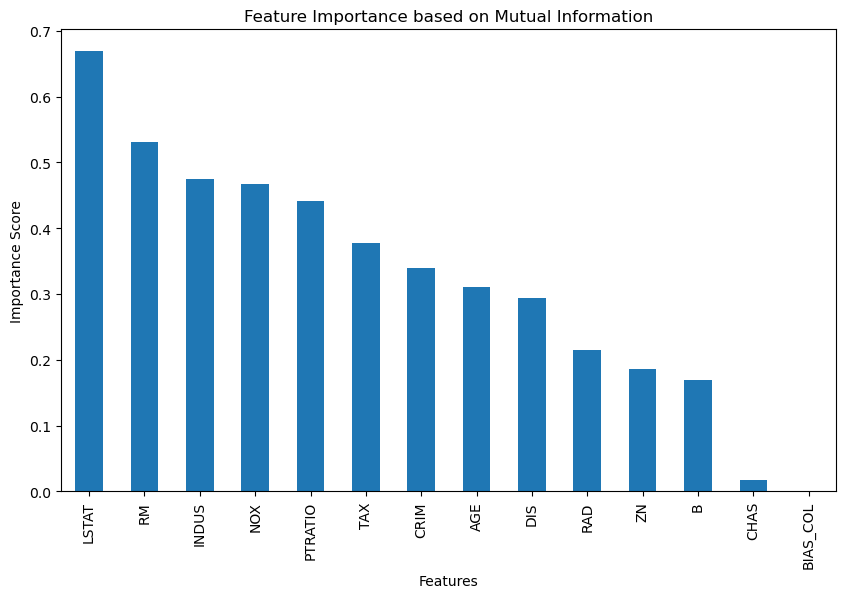

In [13]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Calculate mutual information
imp = mutual_info_regression(X,y )

# Create a series with feature names and their respective importance scores
feature_importance = pd.Series(imp, index=X.columns)

# Sort the feature importance in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

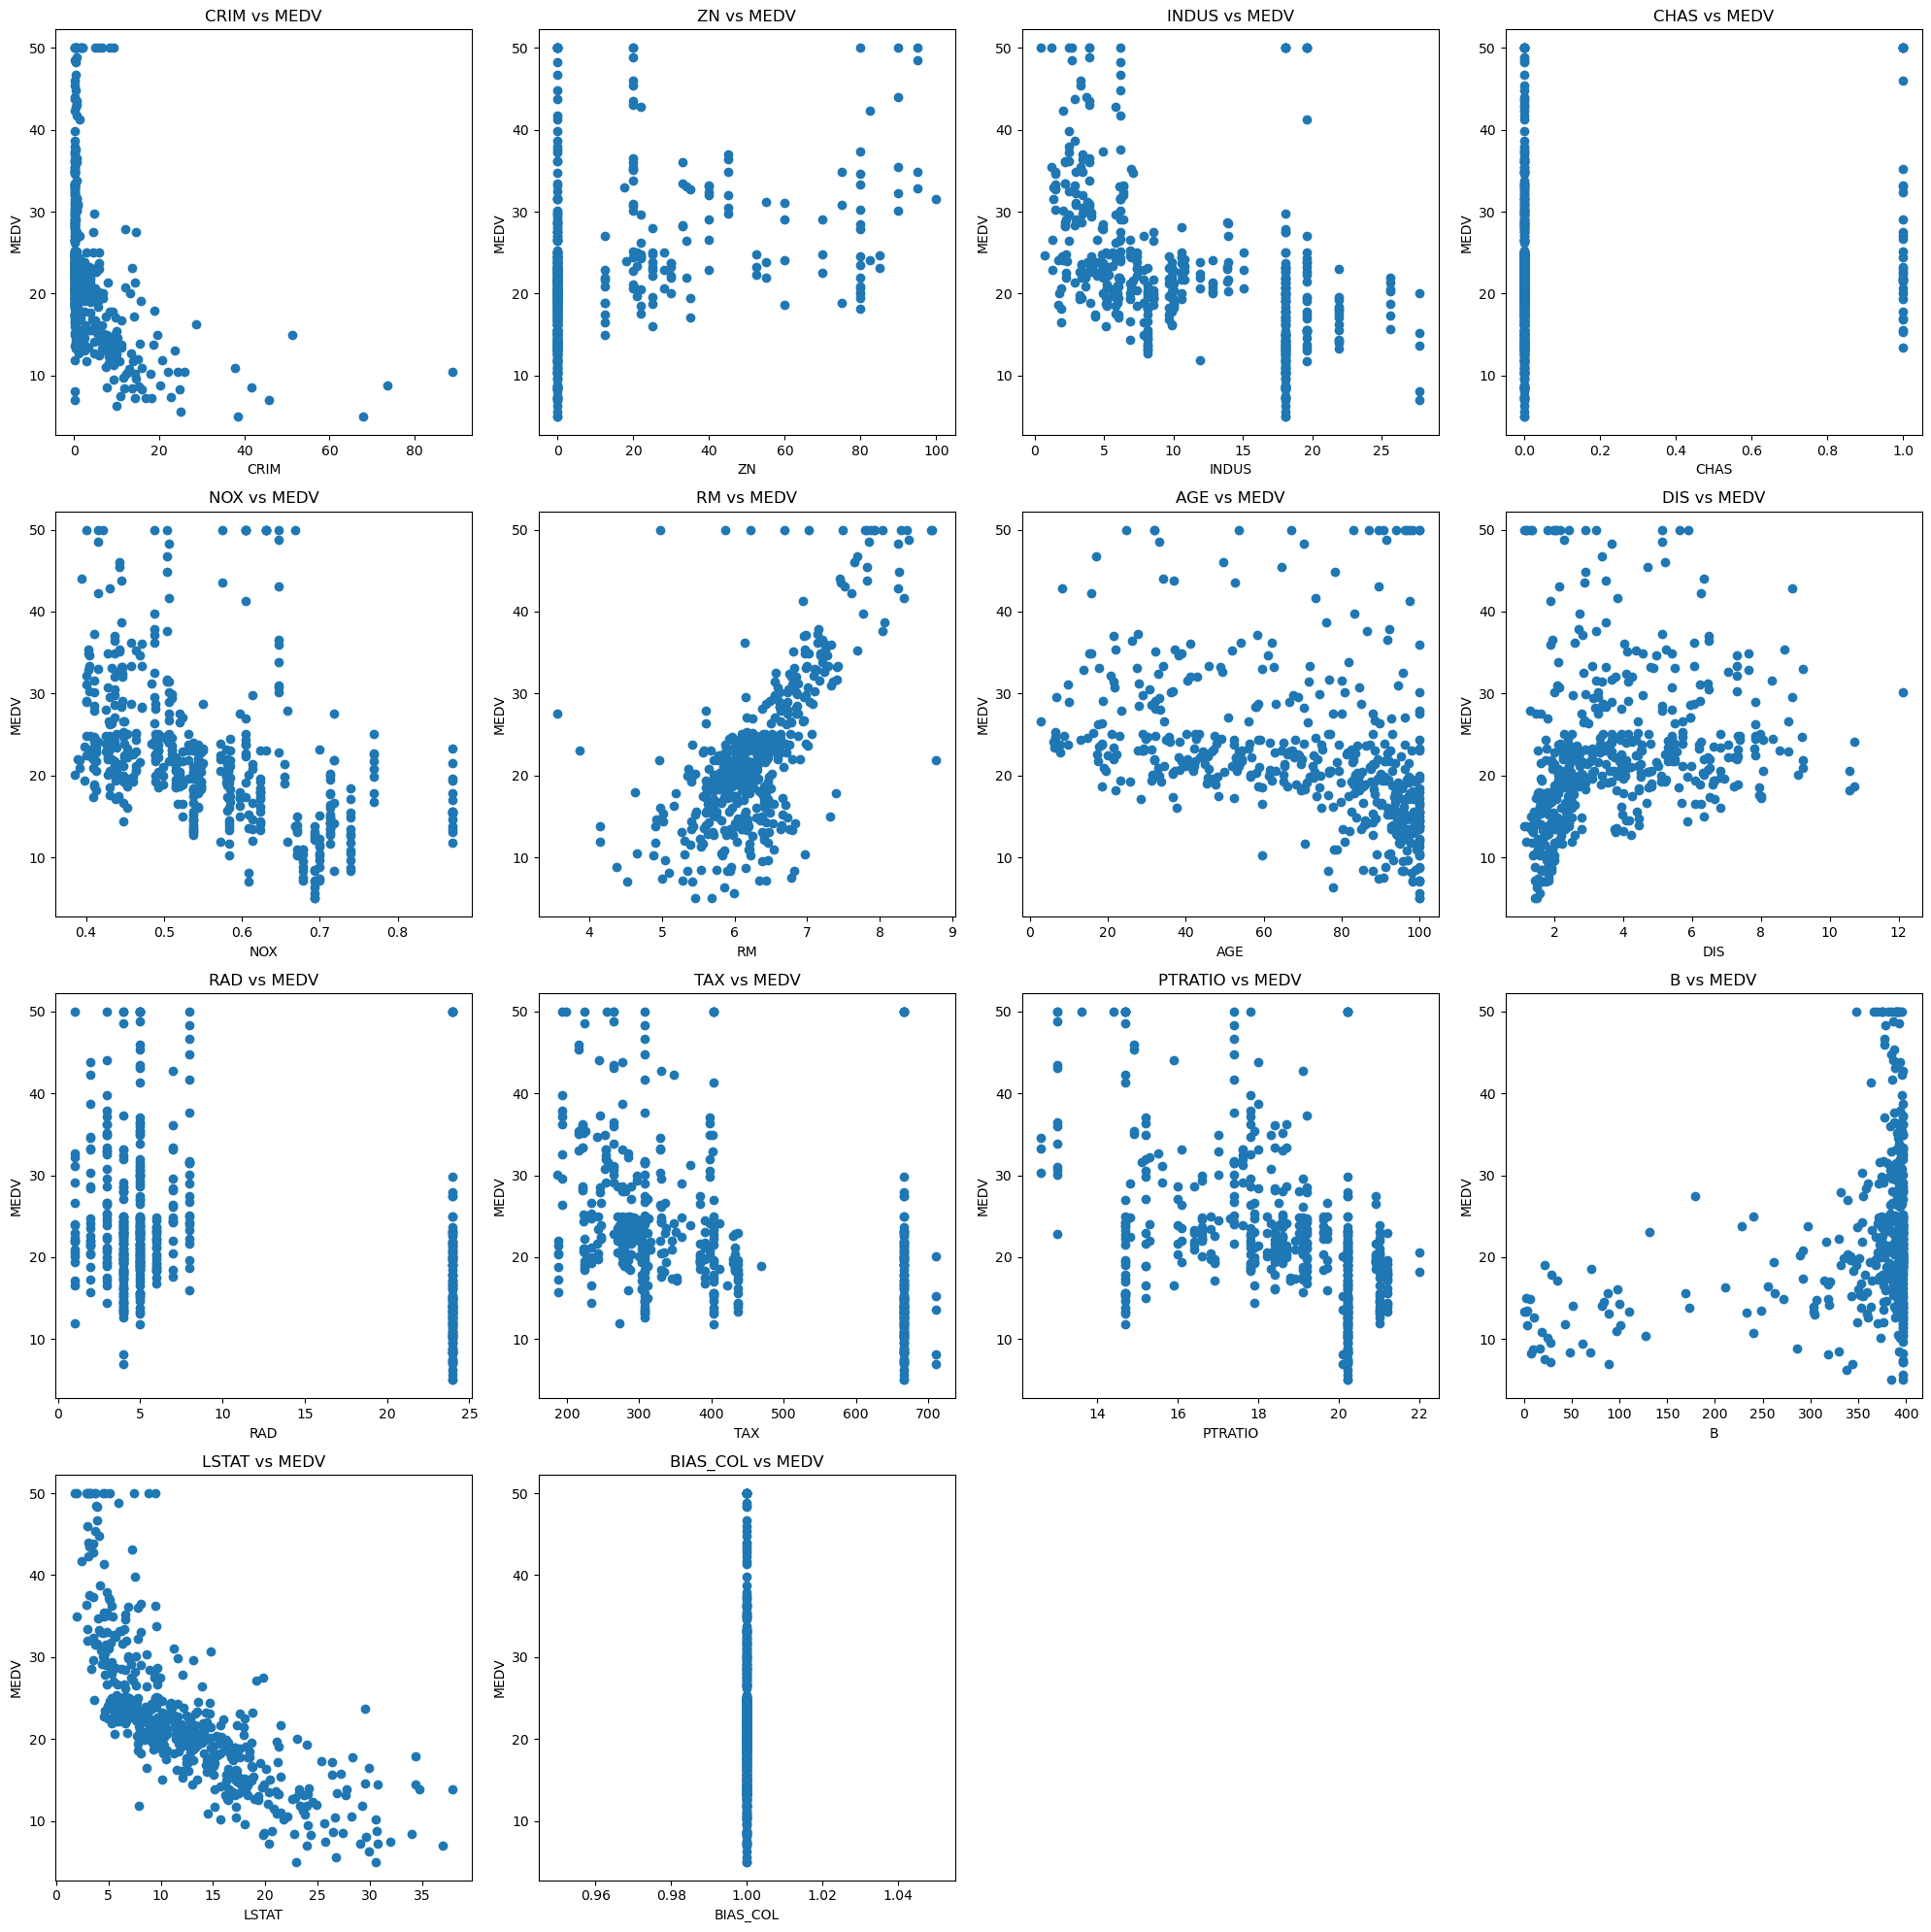

In [27]:
variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'BIAS_COL']

# Plot each variable against MEDV
plt.figure(figsize=(20, 20))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 4, i)
    plt.scatter(df[var], df['MEDV'])
    plt.xlabel(var)
    plt.ylabel('MEDV')
    plt.title(f'{var} vs MEDV')
plt.tight_layout()
plt.show()

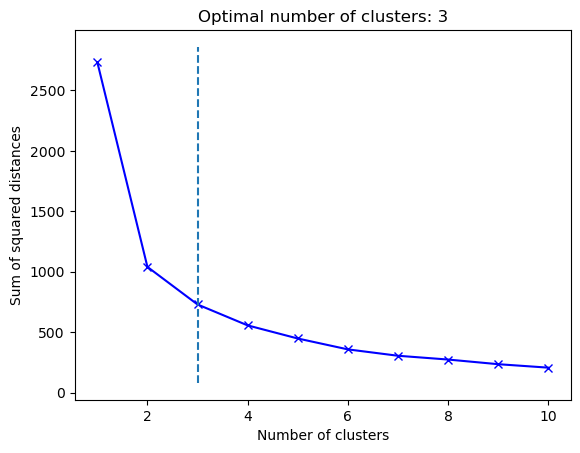

The optimal number of clusters is: 3


C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


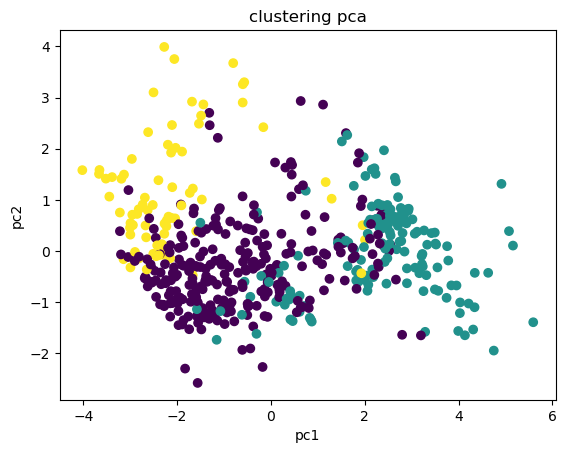

In [35]:
data = pca_df

# Selecting specific columns for clustering
selected_columns = ['PC1', 'PC2']

# Extracting the selected columns from the dataset
data_selected = data[selected_columns]

inertias = []

# Perform KMeans clustering for different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data_selected)
    inertias.append(kmeans.inertia_)

# Find the knee point using KneeLocator
x = range(1, 11)
y = inertias
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
optimal_clusters = kn.knee

# Plot the inertia values and knee point
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title(f'Optimal number of clusters: {optimal_clusters}')
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")
from sklearn.cluster import KMeans
from kneed import KneeLocator
data  = pca_df
kmeans= KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data['PC1'],data['PC2'],  c=kmeans.labels_)
plt.title("clustering pca")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

C:\Users\Selvakumar\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Out-of-Bag Score: 0.7403144294851327
Mean Squared Error: 2.5342397233201575
R-squared: 0.9699804187713078


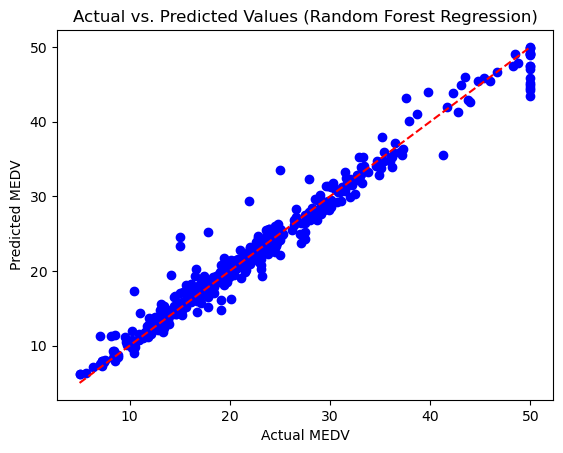

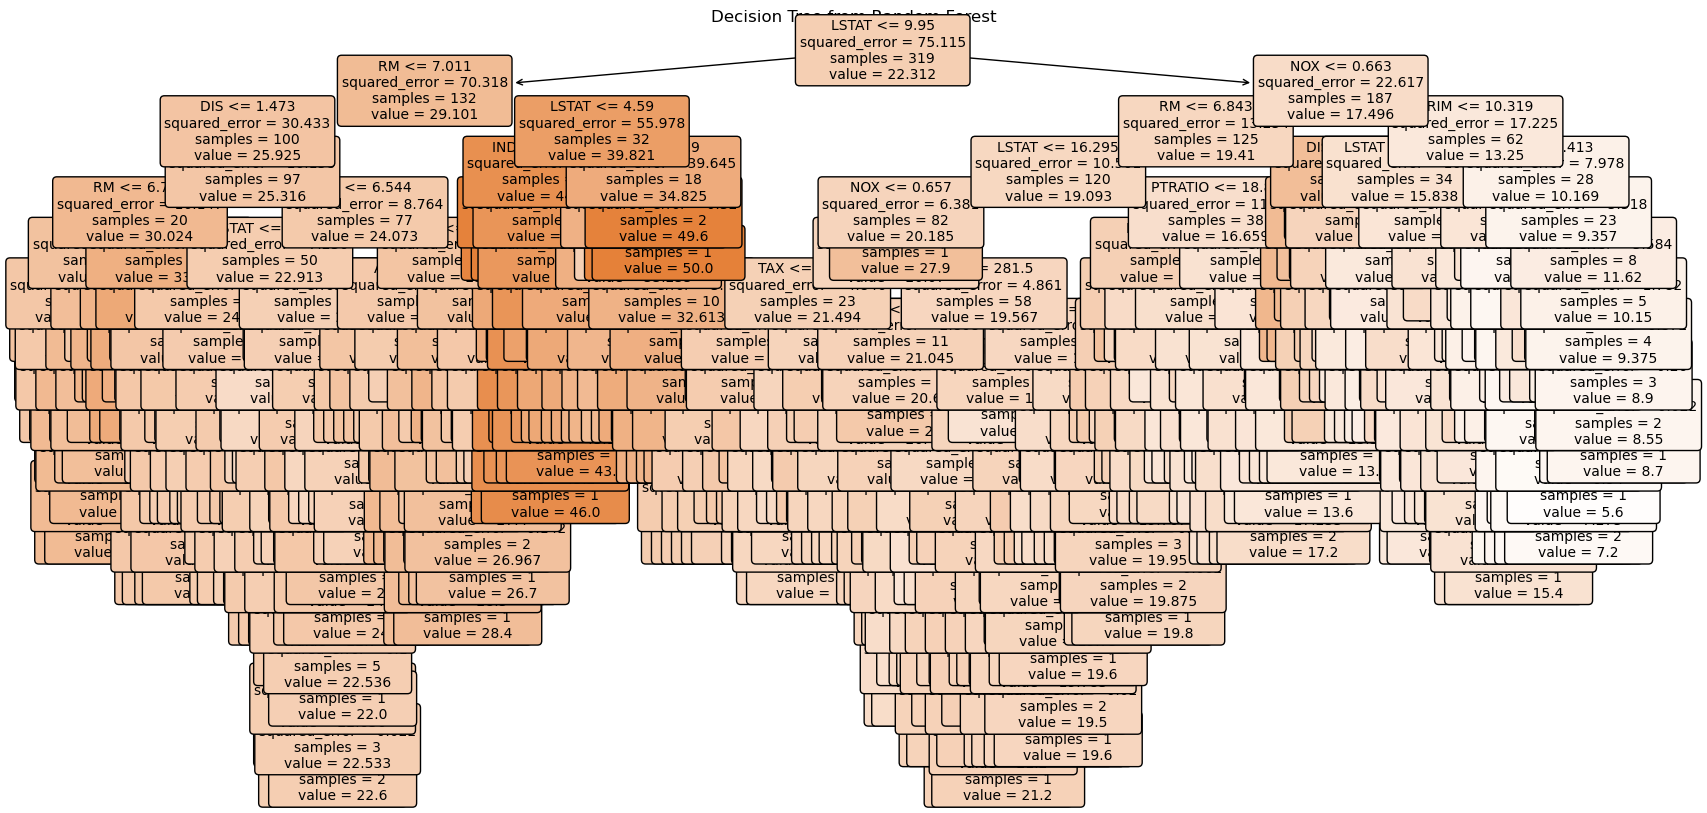

In [90]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


columns_to_drop = [ 'ZN' ,'RAD','B', 'CHAS', 'BIAS_COL','MEDV']
x = df.drop(columns=columns_to_drop)
y= df['MEDV']


# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(x,y)

# Evaluating the model
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

# Plotting regression results
plt.scatter(y, predictions, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Values (Random Forest Regression)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.show()

# Plotting decision tree
tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


In [69]:
# Sample data point
sample_data = {
    'CRIM': [0.2],
    'INDUS': [0.3],
    'NOX': [0.5],
    'RM': [6],
    'AGE': [70],
    'DIS': [5],
    'TAX': [400],
    'PTRATIO': [16],
    'LSTAT': [5]
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)

# Predict median price using the trained model
predicted_medv = regressor.predict(sample_df)

print(f"Predicted Median Price (MEDV): {predicted_medv}")


Predicted Median Price (MEDV): [21.81]


Mean Squared Error: 21.8948311817292
R-squared: 0.7406426641094095


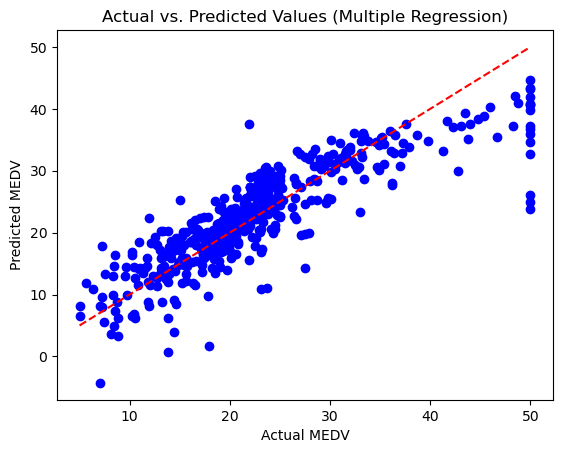

In [96]:
from sklearn import linear_model

columns_to_drop = [ 'MEDV']
x = df.drop(columns=columns_to_drop)
y= df['MEDV']
regr = linear_model.LinearRegression()
regr.fit(x, y)



predictions = regr.predict(x)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

# Plotting regression results
plt.scatter(y, predictions, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Values (Multiple Regression)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.show()

In [101]:
# Sample data point with features excluding 'MEDV'
sample_data = {
    'CRIM': [0.2],     
    'ZN': [20],        
    'INDUS': [0.3],    
    'CHAS': [1],   
    'NOX': [0.5],      
    'RM': [6],        
    'AGE': [70],       
    'DIS': [5],        
    'RAD': [3],        
    'TAX': [400],      
    'PTRATIO': [16],   
    'B': [350],        
    'LSTAT': [5],      
    'BIAS_COL': [0]    
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)

# Predict median price using the trained model
predicted_medv = regr.predict(sample_df)

print(f"Predicted Median Price (MEDV): {predicted_medv}")



Predicted Median Price (MEDV): [28.08135623]


In [ ]:
print("random forest regressor is a better predictor compared to multiple regression")